In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
home_invasion_officers = pd.read_csv("home_invasions_officers.csv")
non_home_invasion_officers = pd.read_csv("non_home_invasion_officers.csv")
home_invasion_officers["home_invasion"] = 1
home_invasion_officers

,officer_id,gender,race,appointed_date,rank,active,birth_year,civilian_allegation_percentile,honorable_mention_count,internal_allegation_percentile,trr_count,allegation_count,sustained_count,civilian_compliment_count,current_badge,discipline_count,major_award_count,unsustained_count,home_invasion
0,1,M,White,2005-09-26,Sergeant of Police,Yes,1971,61.2069,61,76.9384,7,6,0,4,1424.0,0,0,0,1
1,16,M,Asian/Pacific,2008-04-28,Police Officer,Yes,1984,97.3590,29,83.9944,24,19,1,5,14008.0,1,0,6,1
2,39,F,White,1986-08-11,Police Officer,No,1952,81.7842,13,0.0000,2,24,0,12,12511.0,0,0,17,1
3,47,M,Hispanic,2001-05-29,Police Officer,Yes,1974,45.3259,16,85.2153,2,7,1,2,14467.0,1,0,2,1
4,49,M,Hispanic,2005-09-26,Police Officer,Yes,1972,71.8208,88,0.0000,6,7,0,4,15760.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4180,32441,M,White,1997-08-04,Police Officer,Unknown,1970,92.8393,5,61.1521,2,30,0,2,14355.0,0,0,18,1
4181,32442,M,White,2002-12-02,Police Officer,Unknown,1980,93.2878,57,0.0000,7,23,0,3,3893.0,0,1,3,1
4182,32451,F,Hispanic,1999-03-08,Police Officer,Unknown,1964,84.9050,30,0.0000,4,15,1,3,8686.0,1,0,2,1
4183,32452,M,Hispanic,2000-09-11,Police Officer,Unknown,1968,90.0106,32,0.0000,1,18,1,3,13529.0,1,0,3,1


In [3]:
non_home_invasion_officers["home_invasion"] = 0
non_home_invasion_officers_balanced = non_home_invasion_officers.sample(n=4185)
non_home_invasion_officers

,officer_id,gender,race,appointed_date,rank,active,birth_year,civilian_allegation_percentile,honorable_mention_count,internal_allegation_percentile,trr_count,allegation_count,sustained_count,civilian_compliment_count,current_badge,discipline_count,major_award_count,unsustained_count,home_invasion
0,1,M,White,2005-09-26,Sergeant of Police,Yes,1971,61.2069,61,76.9384,7,6,0,4,1424.0,0,0,0,0
1,2,F,Hispanic,2005-09-26,Police Officer,Yes,1980,76.4252,71,0.0000,4,8,0,2,20373.0,0,0,2,0
2,4,M,White,1969-01-06,Police Officer as Detective,No,1942,58.8524,0,0.0000,0,7,0,1,NaN,0,0,2,0
3,6,M,White,1994-12-05,Police Officer,No,1968,38.7292,2,89.6420,2,6,2,0,18601.0,0,0,2,0
4,7,M,White,1995-12-04,Police Officer,Yes,1972,41.5139,9,61.1521,5,8,0,3,19596.0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,33845,F,Black,NaN,NaN,Unknown,1983,NaN,0,NaN,0,1,0,0,NaN,0,0,0,0
16288,33846,M,Hispanic,NaN,NaN,Unknown,1970,NaN,0,NaN,0,1,0,0,NaN,0,0,1,0
16289,33847,F,White,NaN,NaN,Unknown,1963,NaN,0,NaN,0,1,0,0,NaN,0,0,1,0
16290,33848,M,White,NaN,NaN,Unknown,1966,NaN,0,NaN,0,1,0,0,NaN,0,0,0,0


In [4]:
frames = [home_invasion_officers, non_home_invasion_officers]  # could also used balanced here, but that did not end up helping, probably because it removed so much data.
officers = pd.concat(frames)
officers

,officer_id,gender,race,appointed_date,rank,active,birth_year,civilian_allegation_percentile,honorable_mention_count,internal_allegation_percentile,trr_count,allegation_count,sustained_count,civilian_compliment_count,current_badge,discipline_count,major_award_count,unsustained_count,home_invasion
0,1,M,White,2005-09-26,Sergeant of Police,Yes,1971,61.2069,61,76.9384,7,6,0,4,1424.0,0,0,0,1
1,16,M,Asian/Pacific,2008-04-28,Police Officer,Yes,1984,97.3590,29,83.9944,24,19,1,5,14008.0,1,0,6,1
2,39,F,White,1986-08-11,Police Officer,No,1952,81.7842,13,0.0000,2,24,0,12,12511.0,0,0,17,1
3,47,M,Hispanic,2001-05-29,Police Officer,Yes,1974,45.3259,16,85.2153,2,7,1,2,14467.0,1,0,2,1
4,49,M,Hispanic,2005-09-26,Police Officer,Yes,1972,71.8208,88,0.0000,6,7,0,4,15760.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,33845,F,Black,NaN,NaN,Unknown,1983,NaN,0,NaN,0,1,0,0,NaN,0,0,0,0
16288,33846,M,Hispanic,NaN,NaN,Unknown,1970,NaN,0,NaN,0,1,0,0,NaN,0,0,1,0
16289,33847,F,White,NaN,NaN,Unknown,1963,NaN,0,NaN,0,1,0,0,NaN,0,0,1,0
16290,33848,M,White,NaN,NaN,Unknown,1966,NaN,0,NaN,0,1,0,0,NaN,0,0,0,0


## One Hot Encoding

In [5]:
numerical_officers = officers
one_hot_gender = pd.get_dummies(numerical_officers.gender)
one_hot_race = pd.get_dummies(numerical_officers.race)
one_hot_active = pd.get_dummies(numerical_officers.active)
numerical_officers = officers[['birth_year', 'honorable_mention_count',
                         'trr_count', 'sustained_count', 'civilian_compliment_count',
                         'discipline_count']].copy()
# print(one_hot_gender)
# print(one_hot_race)
# print(one_hot_active)
numerical_officers['female'] = one_hot_gender['F']
numerical_officers['male'] = one_hot_gender['M']
numerical_officers['Asian/Pacific'] = one_hot_race['Asian/Pacific']
numerical_officers['Black'] = one_hot_race['Black']
numerical_officers['Hispanic'] = one_hot_race['Hispanic']
numerical_officers['Native American/Alaskan Native'] = one_hot_race['Native American/Alaskan Native']
numerical_officers['Unknown_Race'] = one_hot_race['Unknown']
numerical_officers['White'] = one_hot_race['White']
numerical_officers['Active'] = one_hot_active['Yes']
numerical_officers['Inactive'] = one_hot_active['No']
numerical_officers['Unknown_Active'] = one_hot_active['Unknown']
numerical_officers


,birth_year,honorable_mention_count,trr_count,sustained_count,civilian_compliment_count,discipline_count,female,male,Asian/Pacific,Black,Hispanic,Native American/Alaskan Native,Unknown_Race,White,Active,Inactive,Unknown_Active
0,1971,61,7,0,4,0,0,1,0,0,0,0,0,1,1,0,0
1,1984,29,24,1,5,1,0,1,1,0,0,0,0,0,1,0,0
2,1952,13,2,0,12,0,1,0,0,0,0,0,0,1,0,1,0
3,1974,16,2,1,2,1,0,1,0,0,1,0,0,0,1,0,0
4,1972,88,6,0,4,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16287,1983,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
16288,1970,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
16289,1963,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
16290,1966,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1


In [6]:
y = officers["home_invasion"].to_numpy()
y

array([1, 1, 1, ..., 0, 0, 0])

In [7]:
X = numerical_officers.to_numpy()
X

array([[1971,   61,    7, ...,    1,    0,    0],
       [1984,   29,   24, ...,    1,    0,    0],
       [1952,   13,    2, ...,    0,    1,    0],
       ...,
       [1963,    0,    0, ...,    0,    0,    1],
       [1966,    0,    0, ...,    0,    0,    1],
       [1960,    0,    0, ...,    0,    0,    1]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
print(X_test)
print(X_train)

[[ 1.1016091   0.1156497   2.69625614 ...  0.79287692 -0.69786738
  -0.24922886]
 [ 0.29263352 -0.75877572 -0.65778847 ... -1.2612298   1.43293701
  -0.24922886]
 [-0.06691118 -0.54770751 -0.65778847 ...  0.79287692 -0.69786738
  -0.24922886]
 ...
 [-0.51634206 -0.60801272 -0.36613241 ...  0.79287692 -0.69786738
  -0.24922886]
 [ 0.47240587 -0.0049607   0.21717969 ...  0.79287692 -0.69786738
  -0.24922886]
 [-1.14554528 -0.33663931 -0.51196044 ... -1.2612298   1.43293701
  -0.24922886]]
[[-3.48258584 -0.78892832 -0.65778847 ... -1.2612298   1.43293701
  -0.24922886]
 [ 0.11286117  0.80915952  0.07135167 ...  0.79287692 -0.69786738
  -0.24922886]
 [ 0.47240587 -0.15572371  6.05030074 ...  0.79287692 -0.69786738
  -0.24922886]
 ...
 [ 0.47240587 -0.45724971 -0.22030439 ...  0.79287692 -0.69786738
  -0.24922886]
 [-0.60622823 -0.72862312 -0.65778847 ... -1.2612298   1.43293701
  -0.24922886]
 [ 0.29263352 -0.21602891 -0.36613241 ...  0.79287692 -0.69786738
  -0.24922886]]


In [11]:
LSVC = LinearSVC(max_iter = 10000, dual=False)

LSVC.fit(X_train, y_train)
y_test_LSVC_model = LSVC.predict(X_test)
print("LSVC Accuracy :", accuracy_score(y_test, y_test_LSVC_model))

LSVC Accuracy : 0.80078125


<Figure size 1440x1440 with 0 Axes>

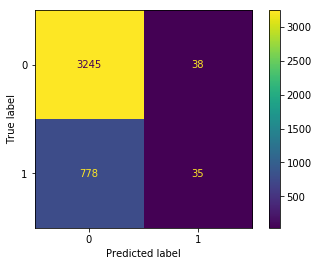

In [12]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(LSVC, X_test, y_test)
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier

gnb = GaussianNB()
KNN = KNeighborsClassifier(n_neighbors=1)
MNB = MultinomialNB()
BNB = BernoulliNB()
LR = LogisticRegression()
SDG = SGDClassifier()
SVC = SVC()
NSVC = NuSVC()

GaussianNB Accuracy : 0.20654296875


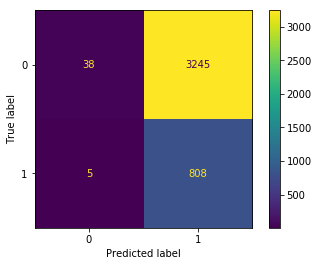

KNN Accuracy : 0.56494140625


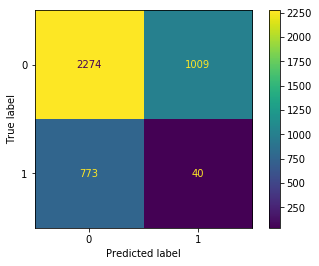

BNB Accuracy : 0.7255859375


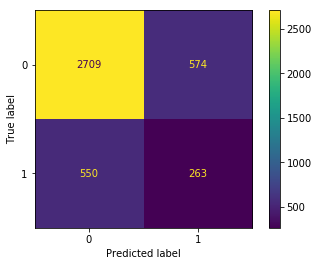

LR Accuracy : 0.801025390625


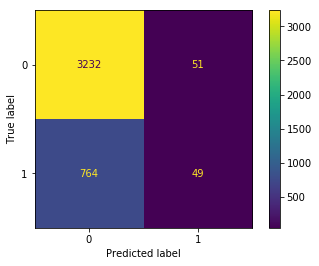

SDG Accuracy : 0.80078125


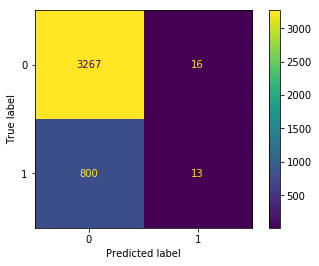

SVC Accuracy : 0.801025390625


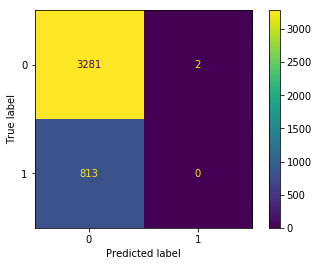

In [14]:
# Train our classifier and test predict
gnb.fit(X_train, y_train)
y_test_GNB_model = gnb.predict(X_test)
print("GaussianNB Accuracy :", accuracy_score(y_test, y_test_GNB_model))
plot_confusion_matrix(gnb, X_test, y_test)
plt.show()

KNN.fit(X_train,y_train)
y_test_KNN_model = KNN.predict(X_test)
print("KNN Accuracy :", accuracy_score(y_test, y_test_KNN_model))
plot_confusion_matrix(KNN, X_test, y_test)
plt.show()

#MNB.fit(X_train,y_train)
#y_test_MNB_model = MNB.predict(X_test)
#print("MNB Accuracy :", accuracy_score(y_test, y_test_MNB_model))
# plot_confusion_matrix(MNB, X_test, y_test)
# plt.show()

BNB.fit(X_train,y_train)
y_test_BNB_model = BNB.predict(X_test)
print("BNB Accuracy :", accuracy_score(y_test, y_test_BNB_model))
plot_confusion_matrix(BNB, X_test, y_test)
plt.show()

LR.fit(X_train,y_train)
y_test_LR_model = LR.predict(X_test)
print("LR Accuracy :", accuracy_score(y_test, y_test_LR_model))
plot_confusion_matrix(LR, X_test, y_test)
plt.show()

SDG.fit(X_train,y_train)
y_test_SDG_model = SDG.predict(X_test)
print("SDG Accuracy :", accuracy_score(y_test, y_test_SDG_model))
plot_confusion_matrix(SDG, X_test, y_test)
plt.show()

SVC.fit(X_train,y_train)
y_test_SVC_model = SVC.predict(X_test)
print("SVC Accuracy :", accuracy_score(y_test, y_test_SVC_model))
plot_confusion_matrix(SVC, X_test, y_test)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'kernel': ['rbf', 'linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]
model = SVC
clf = GridSearchCV(model, parameters, return_train_score = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('best accuracy: ',accuracy_score(y_test, y_pred) )
clf.best_estimator_